## MNIST Dataset with softmax
## fashionmnist
<hr/>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/che/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [32]:
#import and cut datas
train_data = pd.read_csv('fashion-mnist_train.csv', dtype='float32')
train_data = np.array(train_data)
train_Y = train_data[:,[0]]
train_X = train_data[:,1:]

## Check train images using matplotlib

[123] [477] [708] [408] [260] [384] [45] [467] [96] [748] 

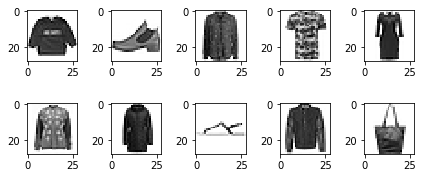

In [108]:
# check train images
check = tf.Session()
for r in range(0,10):
    plt.subplot(3,5,r+1)
    print(check.run(tf.arg_max(train_X[r:r+1],1)), end=' ')
    plt.imshow(train_X[r:r+1].reshape(28, 28),
              cmap = 'Greys', interpolation='nearest')
    plt.tight_layout()
check.close()

## Building custom Batch generator 

In [33]:
# Coding custom Batch Generator 
class BatchGenerator():
    where = 0
    def __init__(self, x, y, batch_size, one_hot = False, nb_classes = 0):
        self.nb_classes = nb_classes
        self.one_hot = one_hot
        self.x_ = x
        self.y_ = y
        self.batch_size = batch_size
        
        self.total_batch = int(len(x) / batch_size)
        self.x = self.x_[:batch_size,:]
        self.y = self.y_[:batch_size,:]
        self.where = 100
        
        if self.one_hot :
            self.set_one_hot()

    def next_batch(self):
        if self.where + self.batch_size > len(self.x_) :
            self.where = 0
            
        self.x = self.x_[self.where:self.where+self.batch_size,:]
        self.y = self.y_[self.where:self.where+self.batch_size,:]
        self.where += self.batch_size
        
        if self.one_hot:
            self.set_one_hot()
        
    def set_one_hot(self):
        self.y = np.int32(self.y)
        one_hot = np.array(self.y).reshape(-1)
        self.y = np.eye(self.nb_classes)[one_hot]


## Set Variables, placeholder and train model to using TF

In [111]:
# there are 10 of type fashion items 
nb_classes = 10

# set tf variables 
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))


logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y)
cost = tf.reduce_mean(cost_i)

train = tf.train.GradientDescentOptimizer(learning_rate= 0.001).minimize(cost)

datas = BatchGenerator(train_X, train_Y, batch_size=100, one_hot=True, nb_classes=nb_classes)


#prediction 
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.arg_max(Y, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [112]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## Training !

In [116]:
# run!
for step in range(100):
    av_cost = 0
    for i in range(datas.total_batch):
        co_v, _ = sess.run([cost, train], feed_dict = {X: datas.x, Y: datas.y})
        datas.next_batch()
        av_cost += co_v / datas.total_batch
    

    print('step : {} cost: {:.5f}'.format(step, av_cost),end='\t')
    print('Accuracy: {:.5f}% ' .format(
        accuracy.eval(
        session=sess, 
        feed_dict = {X: datas.x, Y: datas.y}) * 100))

step : 0 cost: 93.42359	Accuracy: 73.00000% 
step : 1 cost: 94.12688	Accuracy: 80.00000% 
step : 2 cost: 93.20909	Accuracy: 71.00000% 
step : 3 cost: 95.35642	Accuracy: 80.00000% 
step : 4 cost: 95.58890	Accuracy: 81.00000% 
step : 5 cost: 94.68613	Accuracy: 78.00000% 
step : 6 cost: 95.20033	Accuracy: 81.00000% 
step : 7 cost: 94.61425	Accuracy: 74.00000% 
step : 8 cost: 95.31319	Accuracy: 77.00000% 
step : 9 cost: 96.13261	Accuracy: 78.00000% 
step : 10 cost: 97.96166	Accuracy: 78.00000% 
step : 11 cost: 92.85165	Accuracy: 78.00000% 
step : 12 cost: 93.82773	Accuracy: 74.00000% 
step : 13 cost: 92.78666	Accuracy: 73.00000% 
step : 14 cost: 98.60497	Accuracy: 80.00000% 
step : 15 cost: 90.36755	Accuracy: 78.00000% 
step : 16 cost: 91.32255	Accuracy: 76.00000% 
step : 17 cost: 93.25501	Accuracy: 73.00000% 
step : 18 cost: 98.01233	Accuracy: 76.00000% 
step : 19 cost: 92.82852	Accuracy: 77.00000% 
step : 20 cost: 95.93625	Accuracy: 76.00000% 
step : 21 cost: 94.47120	Accuracy: 79.00000%

## Test model with test datas 

----- TEST -----
Accuracy: 81.64% 



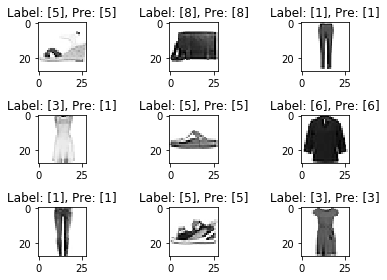

In [115]:

import random
#import and cut datas
test_data = pd.read_csv('fashion-mnist_test.csv', dtype='float32')
test_data = np.array(train_data)
test_Y = test_data[:,[0]]
test_X = test_data[:,1:]

test = BatchGenerator(test_X, test_Y, batch_size=50000 ,one_hot=True, nb_classes=10)


print('----- TEST -----')
print('Accuracy: {:.2f}% \n' 
      .format(accuracy.eval(session=sess, feed_dict={X:test.x, Y:test.y}) * 100 ,'%'))

for i in range(9):
    
    r = random.randint(0, 1000 - 1)
    plt.subplot(3,3,i+1)

    plt.title('Label: {}, Pre: {}'.format(sess.run(tf.arg_max(test.y[r:r+1], 1)),
                                                  sess.run(tf.arg_max(hypothesis, 1), 
                                                           feed_dict={X: test.x[r:r+1]})))
    plt.imshow(test.x[r:r+1].reshape(28, 28),
          cmap = 'Greys', interpolation='nearest')
    plt.tight_layout()